In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, date
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import lognorm, norm, triang, genhyperbolic, burr12, johnsonsu, cauchy, skewcauchy

start = date(1950,1,1)
end = datetime.today()

fred_series = {'yield02':  'DGS2',
               'yield30': 'DGS30'}


df = web.DataReader(fred_series.values(), 'fred', start, end)
df.columns = fred_series.keys()
df.index.name = 'date'
df['yield02_chg'] = df.yield02.pct_change()
df.dropna(inplace=True)
# spreadName = "spread" + df.columns[1][5:] + "_" + df.columns[0][5:]
# df[spreadName] = df[df.columns[1]] - df[df.columns[0]]
df

,yield02,yield30,yield02_chg
date,,,
1977-02-15,6.04,7.70,-0.003300
1977-02-16,6.02,7.67,-0.003311
1977-02-17,5.99,7.67,-0.004983
1977-02-18,6.06,7.76,0.011686
1977-02-22,6.09,7.77,0.004950
...,...,...,...
2022-09-01,3.51,3.37,0.017391
2022-09-02,3.40,3.35,-0.031339
2022-09-06,3.50,3.49,0.029412


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,14.720504,442.700001,-75705.070211,inf,0.074107,7.803095e-55
skewcauchy,15.837480,416.752553,-74881.516450,inf,0.074337,3.578052e-55
cauchy,15.856732,414.882661,-74877.021390,inf,0.074647,1.245152e-55
genhyperbolic,185.454062,540.822897,-46843.482254,inf,0.092329,6.223922e-85
burr12,784.639369,1550.467711,-30426.577760,inf,0.128271,8.268470e-164


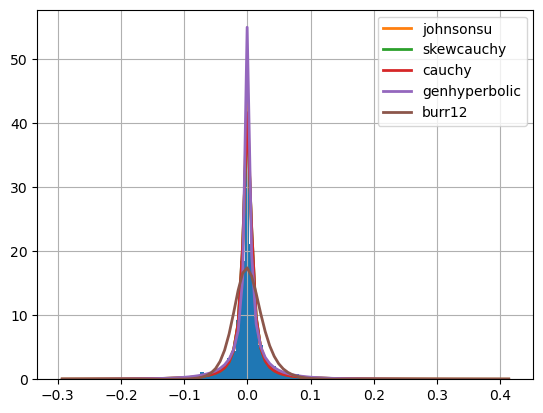

In [2]:
f = Fitter(df.yield02_chg,
          distributions=['lognorm', 'norm', 'genhyperbolic', 'burr12', 'johnsonsu',
                         'cauchy', 'skewcauchy'])
f.fit()
f.summary()

In [3]:
best = f.get_best(method = 'sumsquare_error')
best_distro = list(best.keys())[0]
best_distro

'johnsonsu'

In [4]:
best_parms  = best[best_distro]
best_parms

{'a': -0.005006050983741398,
 'b': 0.5628416366997823,
 'loc': 4.098873805141112e-05,
 'scale': 0.004947989118962418}

In [8]:
randos = johnsonsu.rvs(**best_parms,size=1000)
randos

array([ 6.74812349e-03, -7.18629920e-03,  4.74398515e-05, -1.09868270e-03,
       -5.38958449e-03, -5.17864835e-03,  9.78279558e-04,  2.62026305e-02,
        1.26555782e-02, -2.67116954e-03,  2.96914490e-02, -6.28667150e-03,
       -2.11041719e-02,  4.29103668e-02,  2.13733328e-03, -8.10544208e-03,
       -5.42735312e-02, -2.39841641e-02,  3.40635653e-05,  8.13621758e-04,
       -1.28940042e-03,  3.46833271e-03, -9.48255854e-03,  5.63497136e-03,
       -6.83740776e-03,  3.37196502e-02,  1.04801909e-02,  7.40626793e-04,
        2.20983021e-02, -5.32524407e-04, -5.05182464e-04, -4.35000992e-03,
        6.14019468e-03, -1.07117468e-02, -5.66868803e-03,  1.53435268e-03,
        1.12240387e-02, -1.18103941e-01,  1.30318234e-02, -4.30830233e-03,
       -1.19354441e-02, -6.17689352e-02,  7.76706049e-04,  1.49319881e-03,
        1.35595359e-02, -3.29790265e-02, -1.32470504e-02, -9.09469767e-03,
        1.03914641e-02,  3.04178807e-04,  2.55677484e-03,  5.99452033e-04,
       -2.14261563e-02,  

In [9]:
np.percentile(randos, 5)

-0.044409253341344664

In [10]:
np.percentile(randos, 95)

0.04202124808611084